## Data Preprocessing

In [1]:
# Import the libraries
import os
import numpy as np 
import pandas as pd 
import c_visuals as vs
import matplotlib.pyplot as plt
import seaborn as sns  
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# Change working directory
os.chdir('C:/Users/User/Desktop/Data&Code/Oversea/Oversea_2018')

In [3]:
# Import Data
Oversea = pd.read_excel('OVERSEA_2018_20200305_v0.xlsx')


# Group by created variables
bins = [0, 20, 40, 50, 60, 70, 120]
labels = ['0-19', '20-39', '40-49', '50-59', '60-69','70+']
Oversea_flat = Oversea.groupby(['Customer_ID','Target_Country'])['Buy_Amount'].sum().unstack()
Oversea_flat['Buy_Amount'] = Oversea.groupby(['Customer_ID'])['Buy_Amount'].sum()
Oversea_flat['Age'] = Oversea.groupby(['Customer_ID'])['Age'].first()
Oversea_flat['Gender'] = Oversea.groupby(['Customer_ID'])['Gender'].first()
Oversea_flat['Constellation'] = Oversea.groupby(['Customer_ID'])['Constellation'].first()
Oversea_flat['Com_ID'] = Oversea.groupby(['Customer_ID'])['Com_ID'].first()
Oversea_flat['Sales_ID'] = Oversea.groupby(['Customer_ID'])['Sales_ID'].first()
Oversea_flat.fillna(value=1, inplace=True)

# Age bin
Oversea_flat['Age_bins'] = pd.cut(x=Oversea_flat['Age'], bins = bins, labels = labels,include_lowest = True)
Oversea_flat.index = Oversea_flat.index.str.strip()
Oversea_flat.head()

Target_Country,印尼,新加坡,日本,泰國,深港通,滬港通,美國,香港,馬來西亞,Buy_Amount,Age,Gender,Constellation,Com_ID,Sales_ID,Age_bins
Customer_ID,,,,,,,,,,,,,,,,
18030553,1.0,1.0,9508980.0,4332709.0,1.0,1.0,57097459.0,59186046.0,1.0,130125194,20,OTHER,獅子座,5850,87321,0-19
24863147,1.0,1.0,1.0,1.0,1.0,1.0,2309181.0,1214814.0,1.0,3523995,5,OTHER,摩羯座,585U,86358,0-19
24912013,1.0,1.0,1.0,1.0,1.0,1.0,1.0,671816.0,1.0,671816,5,OTHER,天秤座,5851,82319,0-19
25637393,1.0,1.0,1.0,1.0,24407747.0,1.0,227158646.0,176426465.0,1.0,427992858,11,OTHER,射手座,5850,99136,0-19
25691213,1.0,1.0,1.0,1.0,1.0,1.0,1.0,41652497.0,1.0,41652497,10,OTHER,雙子座,5850,99179,0-19


In [4]:
# Sample number
Oversea_flat.shape

(483, 16)

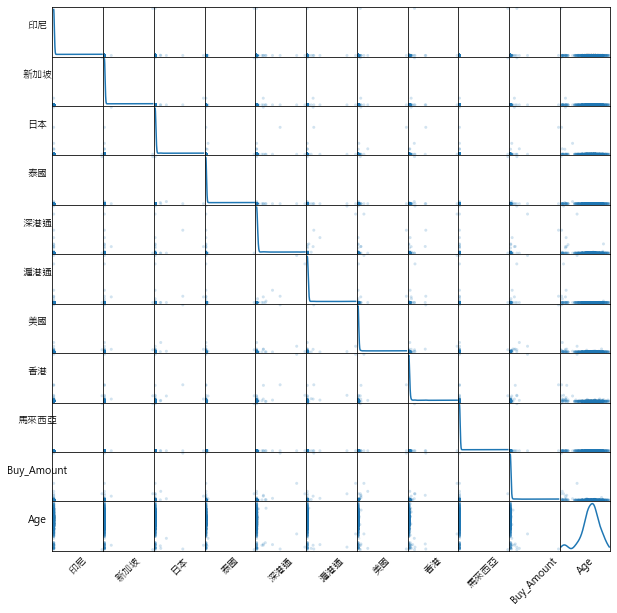

In [134]:
# Scatter_matrix plot of all features
Oversea_flat_numeric = Oversea_flat.iloc[:,:-5]
sm = pd.plotting.scatter_matrix(Oversea_flat_numeric, alpha=0.2, figsize=(10, 10), diagonal = 'kde')

# Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

# plt.show()
plt.savefig('Oversea_2018_Var.png')

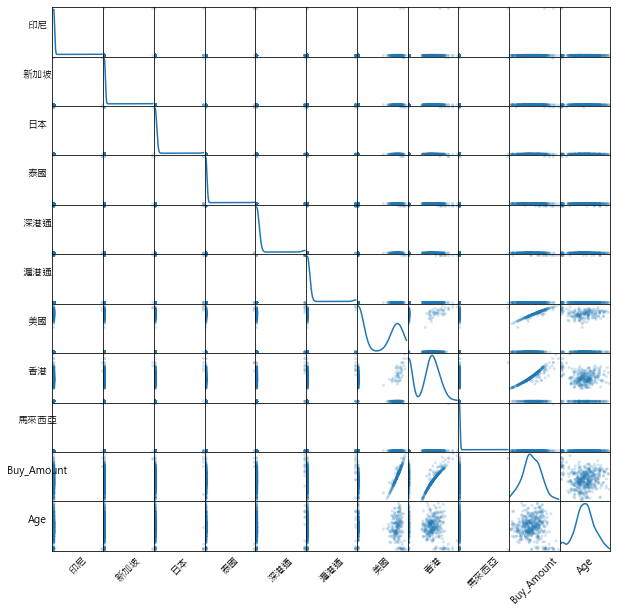

In [135]:
# Scale the data using the Box Cox method
from sklearn.preprocessing import PowerTransformer

bc = PowerTransformer(method='box-cox')
Oversea_scaled_features = bc.fit_transform(Oversea_flat_numeric.values)
Oversea_scaled_features_df = pd.DataFrame(Oversea_scaled_features, index=Oversea_flat_numeric.index,\
                                         columns=Oversea_flat_numeric.columns)
sm = pd.plotting.scatter_matrix(Oversea_scaled_features_df, alpha=0.2, figsize=(10, 10), diagonal = 'kde')

# Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

# plt.show()
plt.savefig('Oversea_2018_Var_Norm.png')

In [5]:
# Gender_df 
Gender_df = Oversea_flat.groupby('Gender').size().to_frame(name = 'Size')
Gender_df['Buy_Amount'] = Oversea_flat.groupby('Gender')['Buy_Amount'].sum()
Gender_df['Buy_Amount'] = Gender_df['Buy_Amount'].apply(lambda x: round(x, 0))
Gender_df

,Size,Buy_Amount
Gender,,
FEMALE,243,767459134
MALE,210,1305396052
OTHER,30,9192677462


In [6]:
# Age df
Age_df = Oversea_flat.groupby('Age_bins').size().to_frame(name = 'Size')
Age_df['Buy_Amount'] = Oversea_flat.groupby('Age_bins')['Buy_Amount'].sum()
Age_df

,Size,Buy_Amount
Age_bins,,
0-19,28,7693574884
20-39,80,1650335389
40-49,155,542213351
50-59,136,626039353
60-69,67,683566860
70+,17,69802811


Text(0.5, 1.0, 'Oversea_2018_Age_distribution')

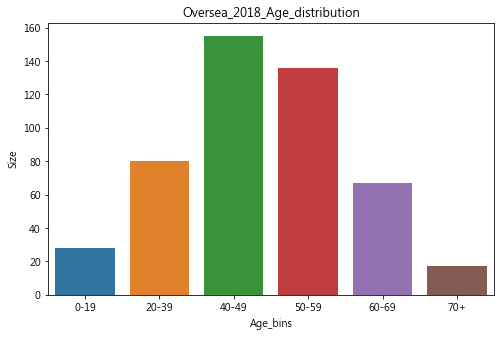

In [7]:
# Plot age distribution
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df.index,y = Age_df['Size'])
plt.title('Oversea_2018_Age_distribution')

Text(0.5, 1.0, 'Oversea_2018_Age_buy_amount')

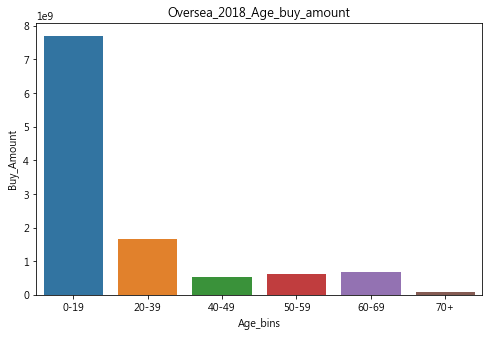

In [8]:
# Age_bin vs. Buy_amount barplot
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df.index, y = Age_df.Buy_Amount)
plt.title('Oversea_2018_Age_buy_amount')

In [25]:
# Age df without corporate customers
Corporate_filter = np.where(Oversea_flat.Gender == 'OTHER')[0]
Oversea_flat_wo_corp =  Oversea_flat.iloc[~Corporate_filter]

Age_df_wo_corp = Oversea_flat_wo_corp.groupby('Age_bins').size().to_frame(name = 'Size')
Age_df_wo_corp['Buy_Amount'] = Oversea_flat_wo_corp.groupby('Age_bins')['Buy_Amount'].sum()
Age_df_wo_corp

,Size,Buy_Amount
Age_bins,,
0-19,0,0
20-39,4,200742
40-49,12,17852615
50-59,11,24037432
60-69,3,8031186
70+,0,0


Text(0.5, 1.0, 'Oversea_2018_Age_buy_amount_n')

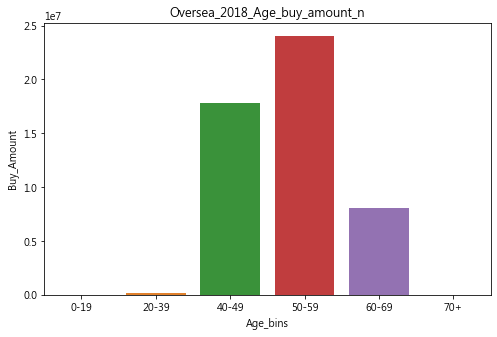

In [26]:
# Age_bin vs. Buy_amount barplot
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df_wo_corp.index, y = Age_df_wo_corp.Buy_Amount)
plt.title('Oversea_2018_Age_buy_amount_n')

Text(0.5, 1.0, 'Oversea_2018_Age_Average_buy_amount')

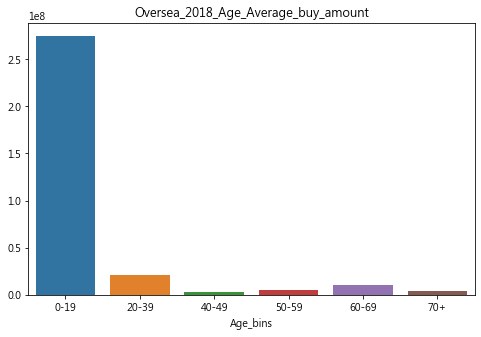

In [167]:
# Age_bin vs. Buy_amount barplot
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df.index, y = Age_df.Buy_Amount / Age_df.Size)
plt.title('Oversea_2018_Age_Average_buy_amount')

Text(0.5, 1.0, 'Oversea_2018_Age_Average_buy_amount_n')

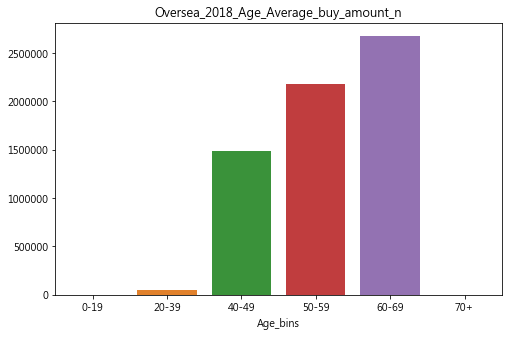

In [27]:
# Age_bin vs. Buy_amount barplot without 0-19
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df_wo_corp.index, y = Age_df_wo_corp.Buy_Amount / Age_df_wo_corp.Size)
plt.title('Oversea_2018_Age_Average_buy_amount_n')

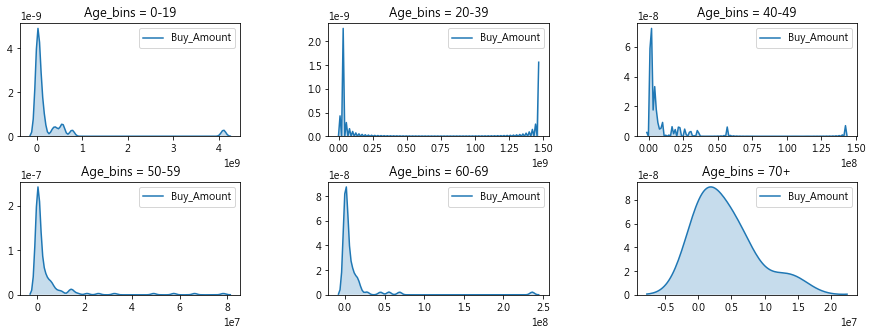

In [141]:
# Age bin kde plot
fig , ax = plt.subplots(figsize = (15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i,j in enumerate(np.sort(Oversea_flat.Age_bins.unique())):
    plt.subplot(2, 3, i+1)
    filter_ = Oversea_flat['Age_bins'] == j
    sns.kdeplot(Oversea_flat.loc[filter_].Buy_Amount, shade=True)
    plt.title("Age_bins = {}" .format(j))

## Outlier Detection

In [142]:
# Outlier detection
import xlsxwriter

# Create a new df with the descriptive features
Oversea_feat_w_prop_df = Oversea_flat

feature_outliers = []
writer = pd.ExcelWriter('Oversea_2018_Outliers_sheets.xlsx', engine='xlsxwriter')

for feature in Oversea_scaled_features_df.keys():
    Q1 = np.percentile(Oversea_scaled_features_df[feature], 25)
    Q3 = np.percentile(Oversea_scaled_features_df[feature], 75)
    step = 1.5*(Q3 - Q1)
    Outlier_Index = ~((Oversea_scaled_features_df[feature] >= Q1 - step)&\
                       (Oversea_scaled_features_df[feature] <= Q3 + step))
    Oversea_feat_w_prop_df.loc[Oversea_scaled_features_df.loc[Outlier_Index].index,:].groupby(['Customer_ID']).first()\
    .to_excel(writer, sheet_name = feature)
    feature_outliers.append(Oversea_feat_w_prop_df.loc[Oversea_scaled_features_df.loc[Outlier_Index].index,:])
writer.save()

# Flatten list of outliers
outliers_flattened = []

for i, j in enumerate(feature_outliers):
    outliers_flattened.append(feature_outliers[i].index)
flat_list = [item for sublist in outliers_flattened for item in sublist]

# Count the number of features for which a given observation is considered an outlier
from collections import Counter
outlier_count = Counter(flat_list)
outliers = [observation for observation in outlier_count.elements() if outlier_count[observation] >= 3]
Oversea_feat_w_prop_df.loc[Oversea_scaled_features_df.loc[outliers].index,:].groupby(['Customer_ID']).first()\
.to_csv('Oversea_2018_Outliers.csv', encoding='utf_8_sig')

In [143]:
# Drop the outliers
Oversea_flat = Oversea_flat.drop(['26318517', '31841577', '42449987', '42539805', '72956685'])

In [144]:
# Check for the 1 only eliminated buy 
for col in Oversea_flat:
    if len(Oversea_flat[col].unique().tolist()) == 1:
        print(col)
        print(Oversea_flat[col].unique().tolist())

印尼
[1.0]
新加坡
[1.0]
馬來西亞
[1.0]


In [145]:
# No need for Malaysia, Singapore, Indonesia
drop_list = ['馬來西亞', '新加坡', '印尼']
Oversea_flat = Oversea_flat.drop(drop_list,axis = 1)

In [146]:
# Rescale data
Oversea_flat_numeric = Oversea_flat.iloc[:,:-5]
bc = PowerTransformer(method='box-cox')
Oversea_scaled_features = bc.fit_transform(Oversea_flat_numeric.values)
Oversea_scaled_features_df = pd.DataFrame(Oversea_scaled_features, index=Oversea_flat_numeric.index,\
                                         columns=Oversea_flat_numeric.columns)

## PCA vs. SVD

,Explained Var,日本,泰國,深港通,滬港通,美國,香港,Buy_Amount,Age
Dim 1,0.2259,0.2526,0.2626,0.5749,0.5450,0.0938,0.1594,0.4242,-0.1598
Dim 2,0.2149,0.2609,0.2502,-0.1740,-0.2128,0.6727,-0.5347,0.2169,-0.0912
Dim 3,0.2005,0.5620,0.5626,-0.2703,-0.2528,-0.2816,0.3493,-0.1104,-0.1314
Dim 4,0.1242,-0.0408,0.0280,-0.1084,-0.2063,0.0514,0.2843,0.5748,0.7276
Dim 5,0.1175,0.2258,0.2286,0.1854,0.2741,-0.1006,-0.3801,-0.4736,0.6390
Dim 6,0.0529,0.7066,-0.7036,0.0008,-0.0105,-0.0404,-0.0149,0.0532,0.0304
Dim 7,0.0456,0.0080,0.0056,0.7206,-0.6774,0.0419,0.0382,-0.1361,0.0051
Dim 8,0.0184,0.0182,-0.0624,-0.0284,0.1307,0.6657,0.5829,-0.4298,0.1010


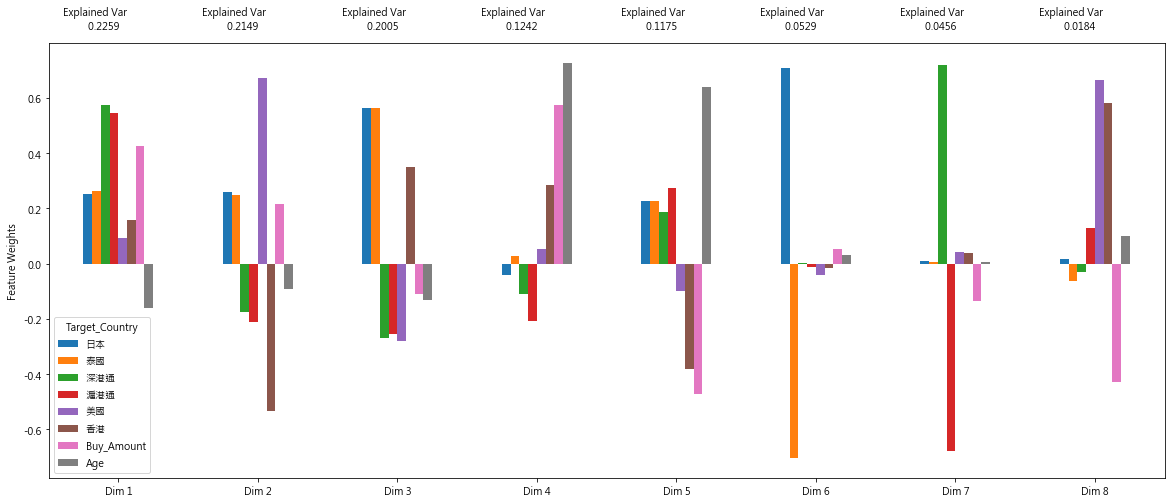

In [147]:
# PCA
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
num_features = Oversea_scaled_features_df.shape[1]
pca = PCA(n_components = num_features, random_state = 0)
pca = pca.fit(Oversea_scaled_features_df)

# Transform log_samples using the PCA fit above

# Generate PCA results plot
vs.pca_results(Oversea_scaled_features_df, pca)

,Explained Var,日本,泰國,深港通,滬港通,美國,香港,Buy_Amount,Age
Dim 1,0.2259,0.2526,0.2626,0.5749,0.5450,0.0938,0.1594,0.4242,-0.1598
Dim 2,0.2149,0.2609,0.2502,-0.1740,-0.2128,0.6727,-0.5347,0.2169,-0.0912
Dim 3,0.2005,0.5620,0.5626,-0.2703,-0.2528,-0.2816,0.3493,-0.1104,-0.1314
Dim 4,0.1242,-0.0408,0.0280,-0.1084,-0.2063,0.0514,0.2843,0.5748,0.7276
Dim 5,0.1175,0.2258,0.2286,0.1854,0.2741,-0.1006,-0.3801,-0.4736,0.6390
Dim 6,0.0529,0.7066,-0.7036,0.0008,-0.0105,-0.0404,-0.0149,0.0532,0.0304
Dim 7,0.0456,0.0080,0.0056,0.7206,-0.6774,0.0419,0.0382,-0.1361,0.0051


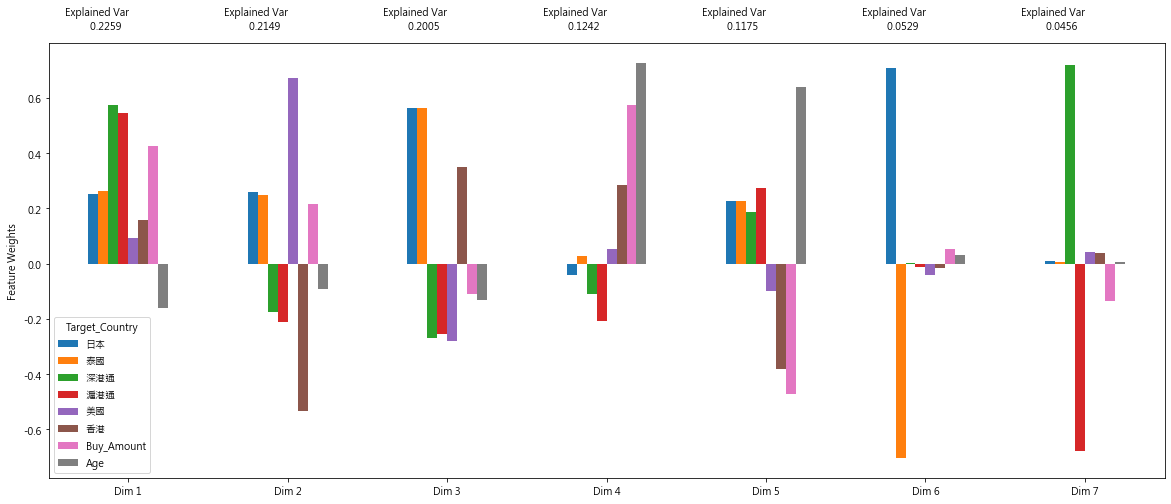

In [148]:
# SVD
from sklearn.decomposition import TruncatedSVD

# Apply PCA by fitting the good data with the same number of dimensions as features
num_features = Oversea_scaled_features_df.shape[1] - 1
svd = TruncatedSVD(n_components = num_features, random_state = 0)
svd = svd.fit(Oversea_scaled_features_df)

# Transform log_samples using the PCA fit above

# Generate PCA results plot
vs.pca_results(Oversea_scaled_features_df, svd)

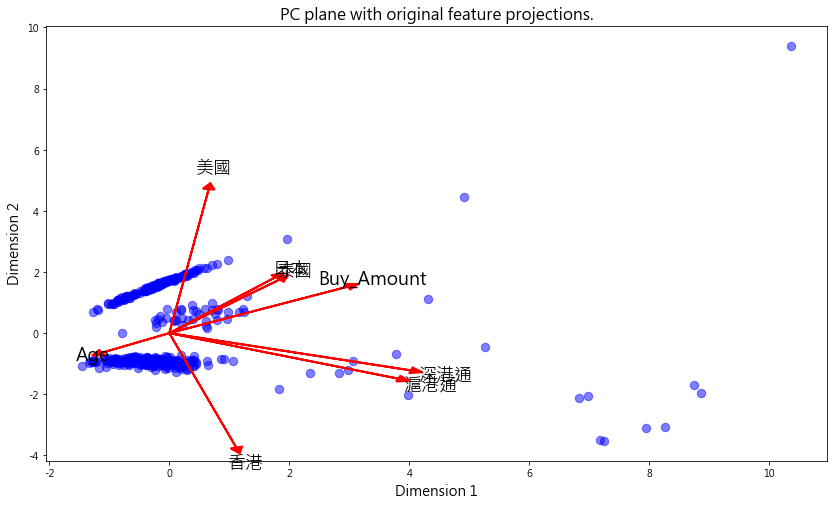

In [149]:
# Apply PCA by fitting data with only 2 Dimensions
pca = PCA(n_components = 2, random_state = 0)
pca = pca.fit(Oversea_scaled_features_df)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(Oversea_scaled_features_df)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

vs.biplot(Oversea_scaled_features_df ,reduced_data, pca)

## K means Clustering

In [81]:
# # Reduce Dimension
# pca = PCA(n_components = num_features - 3, random_state = 0)
# Reduced_Data = pca.fit_transform(Oversea_scaled_features_df)

# # Create a DataFrame for the reduced data
# Reduced_Data_df = pd.DataFrame(Reduced_Data, columns = \
#                                           ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', \
#                                            'Dimension 5', 'Dimension 6', 'Dimension 7', 'Dimension 8'])

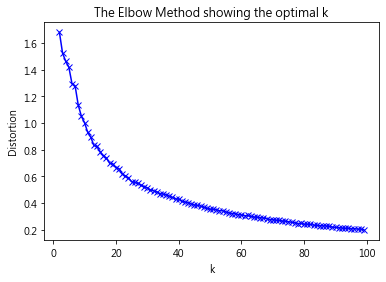

In [150]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(2,100)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Oversea_scaled_features_df)
    distortions.append(sum(np.min(cdist(Oversea_scaled_features_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / \
                       Oversea_scaled_features_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

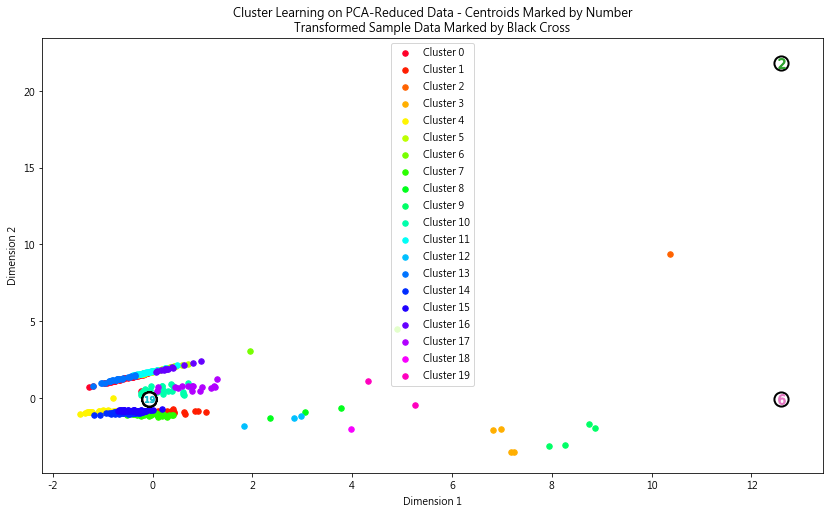

In [151]:
# Clustering(Elbow_method)
optimized_kmeans = KMeans(n_clusters = 20, random_state = 0).fit(Oversea_scaled_features_df)
kmeans_preds = optimized_kmeans.predict(Oversea_scaled_features_df)
kmeans_centers = optimized_kmeans.cluster_centers_
vs.cluster_results(reduced_data, kmeans_preds, kmeans_centers)

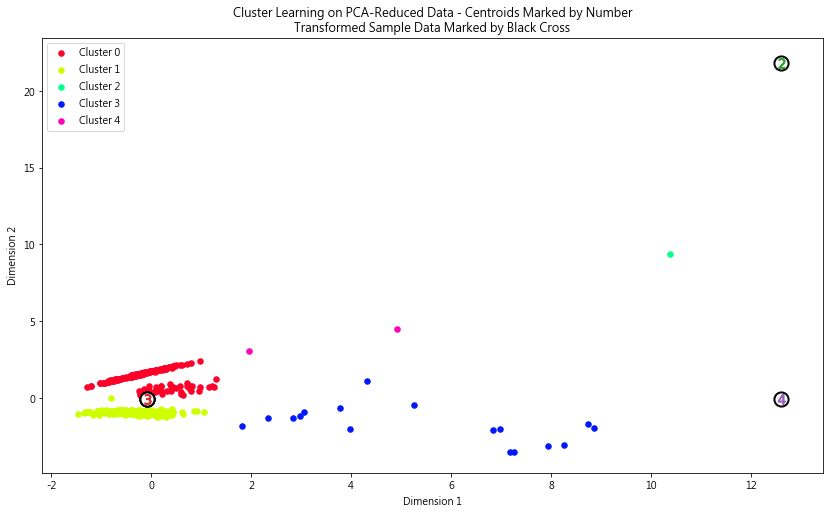

In [152]:
# Clustering(silhouette_score method)
# Clustering(silhouette_score method)
# silhouette_score method
num_clusters = np.arange(2,30)
kmeans_results = {}
for size in num_clusters:
    kmeans = KMeans(n_clusters = size).fit(Oversea_scaled_features_df)
    preds = kmeans.predict(Oversea_scaled_features_df)
    kmeans_results[size] = metrics.silhouette_score(Oversea_scaled_features_df, preds)
    
best_size = max(kmeans_results, key = kmeans_results.get)

optimized_kmeans = KMeans(n_clusters = best_size, random_state = 0).fit(Oversea_scaled_features_df)
kmeans_preds = optimized_kmeans.predict(Oversea_scaled_features_df)
kmeans_centers = optimized_kmeans.cluster_centers_
vs.cluster_results(reduced_data, kmeans_preds, kmeans_centers)

For n_clusters = 2 The average silhouette_score is : 0.37377543562469867
For n_clusters = 3 The average silhouette_score is : 0.4120824130408506
For n_clusters = 4 The average silhouette_score is : 0.4202221203691828
For n_clusters = 5 The average silhouette_score is : 0.42933627038625444
For n_clusters = 6 The average silhouette_score is : 0.33583166256225927
For n_clusters = 7 The average silhouette_score is : 0.3409771960344793
For n_clusters = 8 The average silhouette_score is : 0.3469972609062966
For n_clusters = 9 The average silhouette_score is : 0.3405689319847183
For n_clusters = 10 The average silhouette_score is : 0.3466121045581505
For n_clusters = 11 The average silhouette_score is : 0.3417735920695124


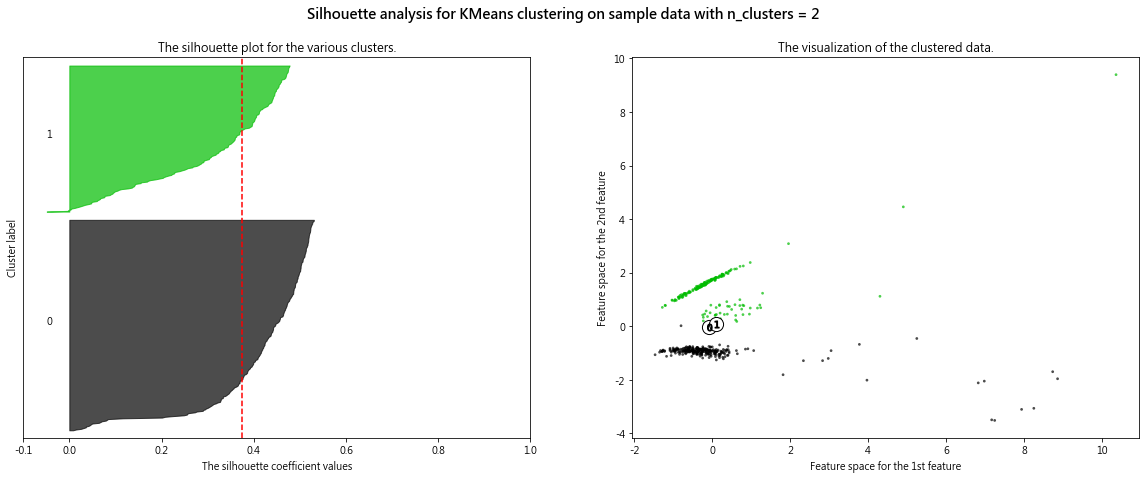

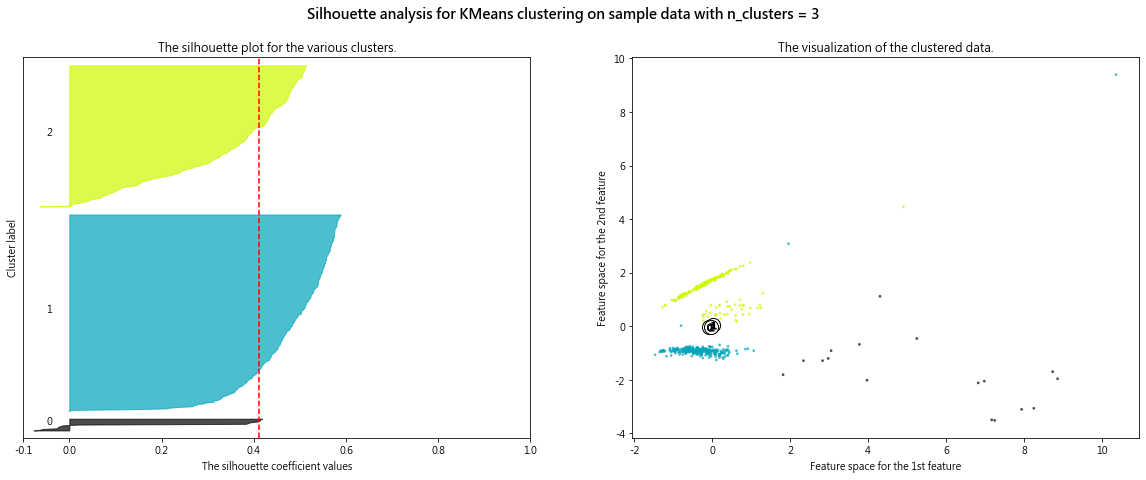

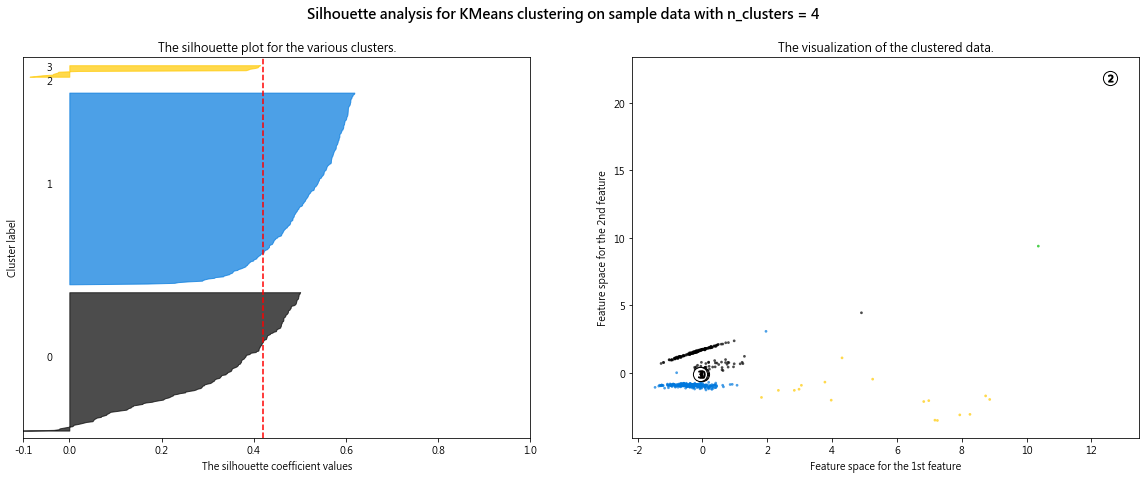

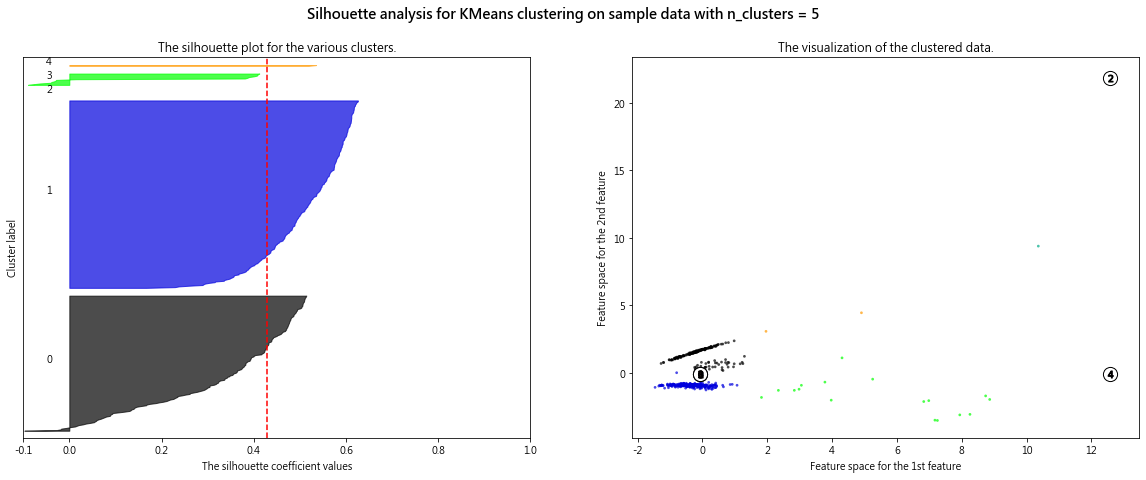

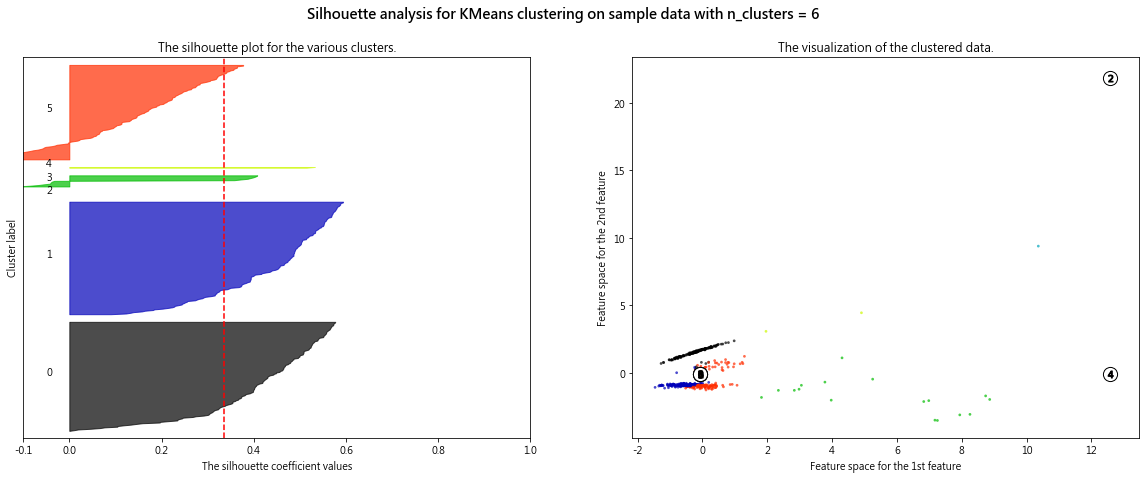

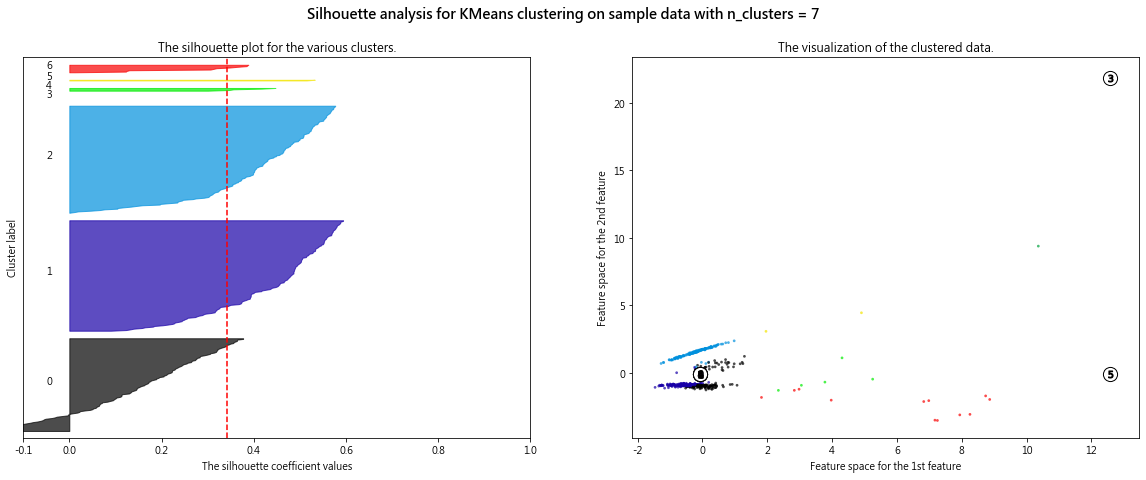

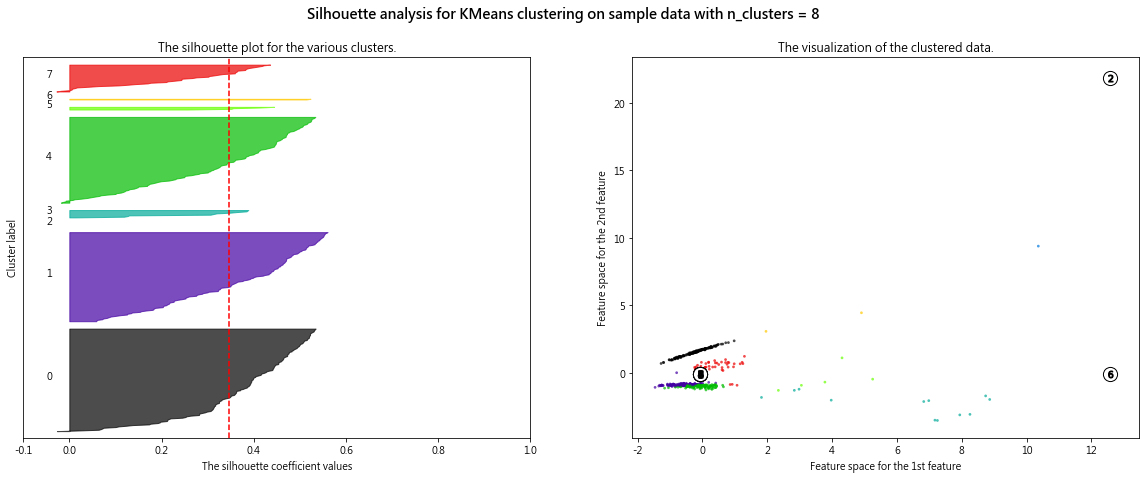

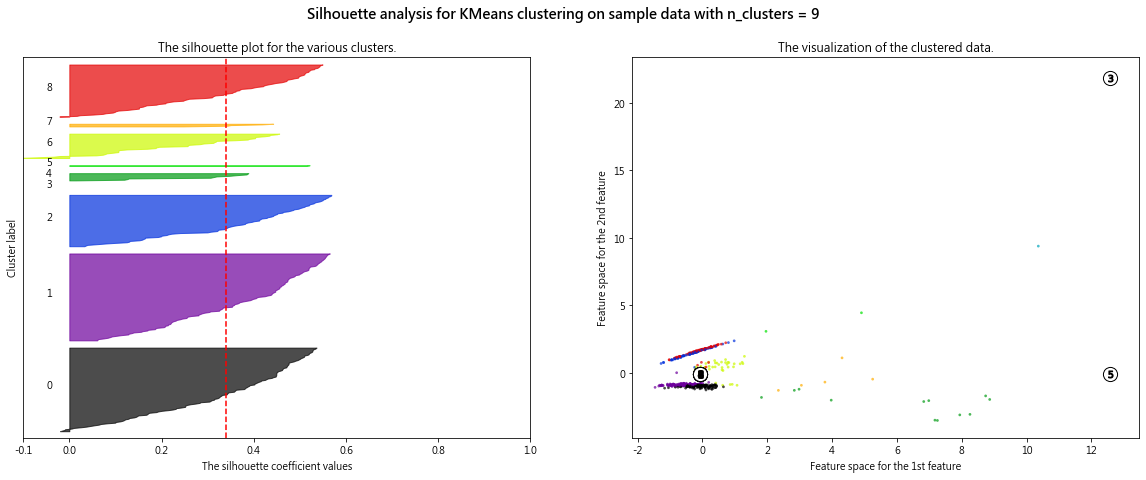

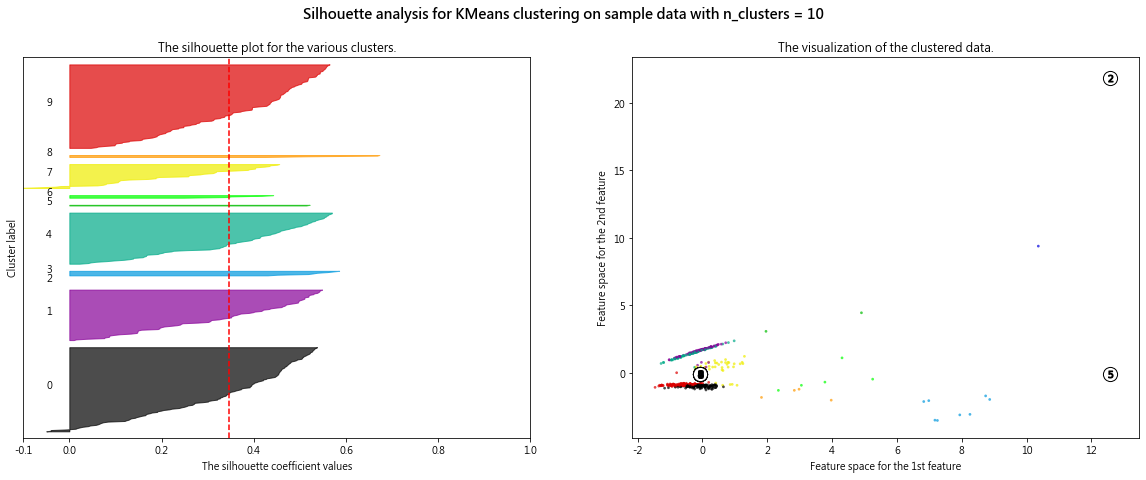

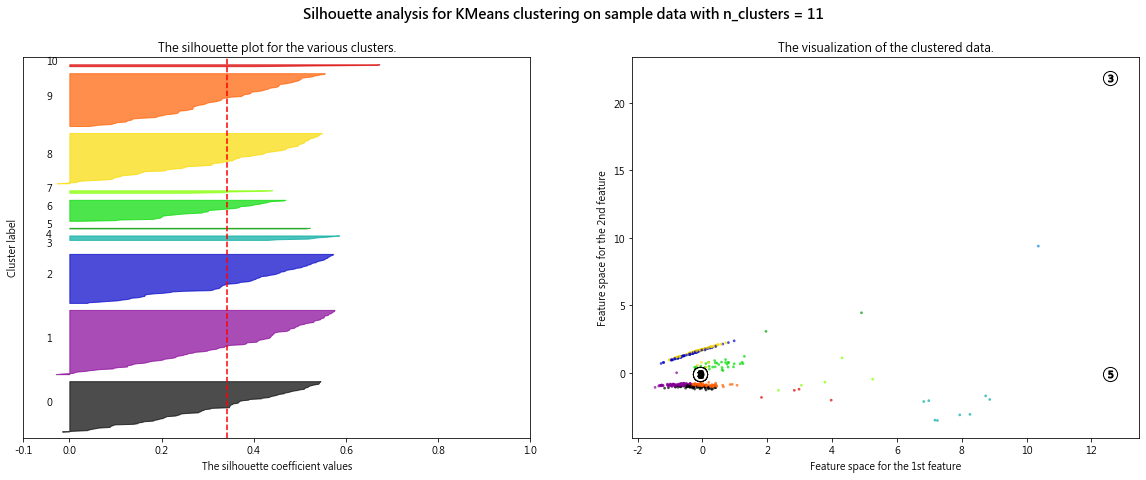

In [153]:
# silhouette_score plot
vs.Silhouette_score(r = 12, df = Oversea_scaled_features_df, reduced_df = reduced_data)
plt.savefig('Oversea_2018'+ '_Silhouette_score' + '.png')

## K Prototype Clustering

In [154]:
Oversea_scaledfeat_w_prop_df = Oversea_scaled_features_df
Oversea_scaledfeat_w_prop_df['Age_bins'] = Oversea_flat['Age_bins']
Oversea_scaledfeat_w_prop_df['Gender'] = Oversea_flat['Gender']
Oversea_scaledfeat_w_prop_df['Constellation'] = Oversea_flat['Constellation']
Oversea_scaledfeat_w_prop_df['Com_ID'] = Oversea_flat['Com_ID']
Oversea_scaledfeat_w_prop_df['Sales_ID'] = Oversea_flat['Sales_ID']

In [155]:
from kmodes.kprototypes import KPrototypes

# K Prototype Clustering
best_size = 5
kproto = KPrototypes(n_clusters = best_size, init='Cao', verbose=2)
kproto_preds = kproto.fit_predict(Oversea_scaledfeat_w_prop_df, categorical=[8, 9, 10, 11, 12])
kproto_centers = kproto.cluster_centroids_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 76, ncost: 2466.3246468988277
Run: 1, iteration: 2/100, moves: 14, ncost: 2456.747795061925
Run: 1, iteration: 3/100, moves: 5, ncost: 2454.711408518457
Run: 1, iteration: 4/100, moves: 0, ncost: 2454.711408518457
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 114, ncost: 2515.1819227003775
Run: 2, iteration: 2/100, moves: 21, ncost: 2445.338407499092
Run: 2, iteration: 3/100, moves: 2, ncost: 2445.2479138121867
Run: 2, iteration: 4/100, moves: 0, ncost: 2445.2479138121867
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 151, ncost: 3033.218624566019
Run: 3, iteration: 2/100, moves: 51, ncost: 2997.357121436358
Run: 3, iteration: 3/100, moves: 28, ncost: 2981.7267396377274
Run: 3, iteration: 4/100, moves: 38, ncost: 2957.953977327612
Run: 3, itera

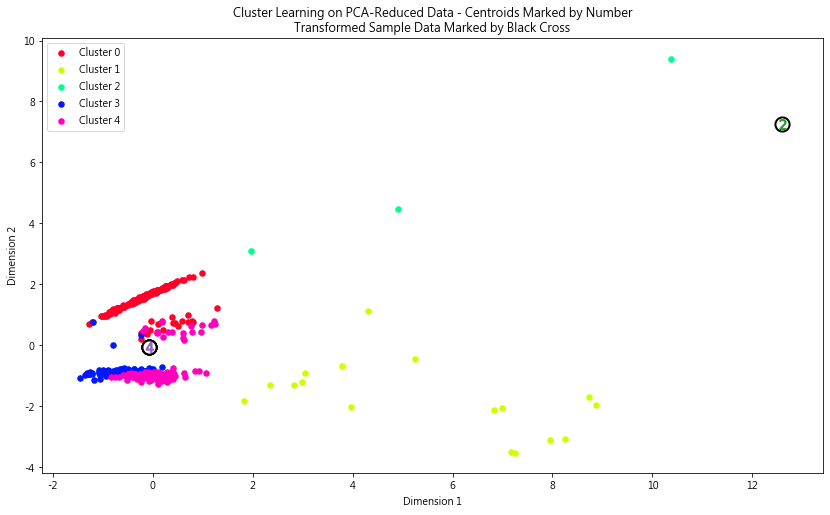

In [156]:
# Plot k prototype
vs.cluster_results(reduced_data, kproto_preds, kproto_centers[0])

## Data Recovery

In [157]:
# ## K mode
# # Inverse transform the box-cox centers
# true_centers = bc.inverse_transform(kproto_centers[0])
# true_centers[np.isnan(true_centers)] = 1
# df1 = pd.DataFrame(kproto_centers[1], columns = Oversea_scaledfeat_w_prop_df.iloc[:,[7, 8, 9, 10, 11]].keys())
# df2 = pd.DataFrame(np.round(true_centers), columns = Oversea_scaled_features_df.iloc[:,:13].keys())

# Display the true centers
kmeans_centers = 5
segments = ['Segment {}'.format(i) for i in range(0,kmeans_centers)]
true_centers_true = pd.DataFrame(kproto_centers[1], columns = Oversea_scaledfeat_w_prop_df.iloc[:,[8, 9, 10, 11, 12]].keys())
true_centers_true.index = segments
display(true_centers_true)

# Segment mean
Oversea_flat['Label'] = kproto.labels_
display(round(Oversea_flat.groupby('Label').mean()))

Target_Country,Age_bins,Gender,Constellation,Com_ID,Sales_ID
Segment 0,40-49,MALE,天蠍座,5850,92018
Segment 1,0-19,OTHER,獅子座,5850,87172
Segment 2,0-19,OTHER,摩羯座,5850,87321
Segment 3,40-49,FEMALE,天秤座,585H,97268
Segment 4,50-59,FEMALE,雙魚座,5850,85343


Target_Country,日本,泰國,深港通,滬港通,美國,香港,Buy_Amount,Age,Sales_ID
Label,,,,,,,,,
0,1.0,1.0,1.0,1.0,9592136.0,82615.0,9674751.0,47.0,64028.0
1,1.0,1.0,29197014.0,44165984.0,42819364.0,47050950.0,163233311.0,42.0,81279.0
2,4755161.0,1444237.0,1.0,1.0,271380714.0,23373305.0,300953415.0,24.0,87262.0
3,1.0,1.0,1.0,1.0,460.0,184936.0,185395.0,46.0,68118.0
4,1.0,1.0,1.0,1.0,1277670.0,4287069.0,5564738.0,52.0,65234.0


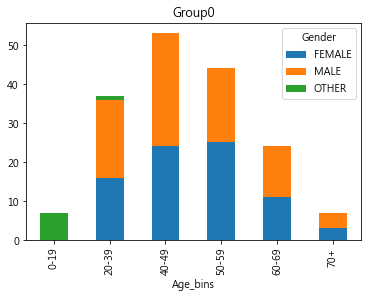

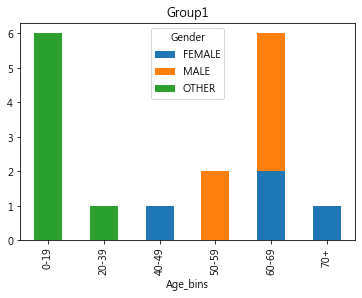

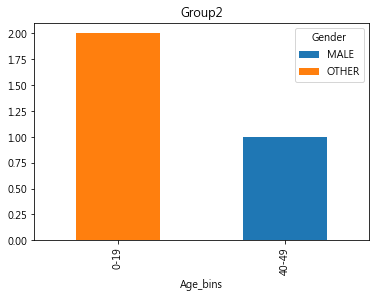

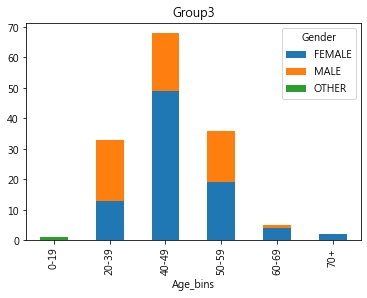

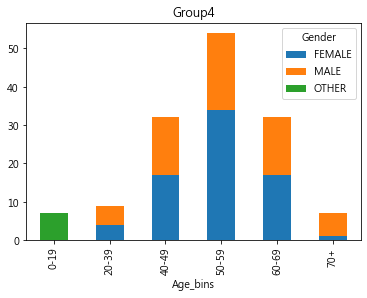

In [158]:
# Plot the Age_Sex features
for tag in np.sort(Oversea_flat['Label'].unique()):
    filter_ = Oversea_flat['Label'] == tag
    ct = pd.crosstab(Oversea_flat[filter_].Age_bins, Oversea_flat[filter_].Gender, margins = False)
    ct.plot.bar(stacked=True)
    plt.title('Group{}'.format(tag))

In [159]:
# Plot the Com_ID_df features
Oversea_scaledfeat_w_prop_df['Label'] = kproto.labels_
for tag in np.sort(Oversea_scaledfeat_w_prop_df['Label'].unique()):
    filter_ = Oversea_scaledfeat_w_prop_df['Label'] == tag
    Com_ID_df = Oversea_scaledfeat_w_prop_df[filter_].groupby('Com_ID').size().to_frame(name = 'Size')
    print('Gp_{}'.format(tag))
    display(Com_ID_df.sort_values(by = 'Size',ascending = False)[:5])

Gp_0


,Size
Com_ID,
5850,37
5857,22
585Z,14
585J,11
585R,10


Gp_1


,Size
Com_ID,
5850,8
585B,2
585U,2
5856,1
5857,1


Gp_2


,Size
Com_ID,
5850,3


Gp_3


,Size
Com_ID,
585H,17
5857,9
5850,9
585J,8
585U,8


Gp_4


,Size
Com_ID,
5850,28
585D,12
585J,10
585U,9
585Q,8


In [160]:
# Save Customer list (k mode)
Oversea_flat.loc[:,['Age', 'Gender', 'Label']].to_excel('Oversea_2018_Customer_list.xlsx')

## ANOVA test 

In [161]:
# ANOVA test (k means)
import scipy.stats as ss
Oversea_flat_t = Oversea_flat.drop(['Gender','Age_bins','Constellation','Com_ID','Sales_ID'], axis = 1)
Oversea_flat_t['Label'] = optimized_kmeans.labels_
for Variable in Oversea_flat_t.keys():
    samples = [val[1] for val in Oversea_flat_t.groupby('Label')[Variable]]
    f_val, p_val = ss.f_oneway(*samples)
    print('Variable: {}, F value: {:.3f}, p value: {:.3f}'.format(Variable, f_val, p_val))

Variable: 日本, F value: 1074.176, p value: 0.000
Variable: 泰國, F value: 189029325419614432.000, p value: 0.000
Variable: 深港通, F value: 39.095, p value: 0.000
Variable: 滬港通, F value: 20.757, p value: 0.000
Variable: 美國, F value: 58.162, p value: 0.000
Variable: 香港, F value: 16.165, p value: 0.000
Variable: Buy_Amount, F value: 31.579, p value: 0.000
Variable: Age, F value: 3.955, p value: 0.004
Variable: Label, F value: 962332195851891712.000, p value: 0.000


In [162]:
# ANOVA test (k mode)
import scipy.stats as ss
Oversea_flat_t = Oversea_flat.drop(['Gender','Age_bins','Constellation','Com_ID','Sales_ID'], axis = 1)
Oversea_flat_t['Label'] = kproto.labels_
for Variable in Oversea_flat_t.keys():
    samples = [val[1] for val in Oversea_flat_t.groupby('Label')[Variable]]
    f_val, p_val = ss.f_oneway(*samples)
    print('Variable: {}, F value: {:.3f}, p value: {:.3f}'.format(Variable, f_val, p_val))

Variable: 日本, F value: 176.937, p value: 0.000
Variable: 泰國, F value: 58.754, p value: 0.000
Variable: 深港通, F value: 39.095, p value: 0.000
Variable: 滬港通, F value: 20.757, p value: 0.000
Variable: 美國, F value: 40.703, p value: 0.000
Variable: 香港, F value: 16.000, p value: 0.000
Variable: Buy_Amount, F value: 29.093, p value: 0.000
Variable: Age, F value: 7.928, p value: 0.000
Variable: Label, F value: 243546064116036896.000, p value: 0.000


In [163]:
# Chi-square for categorical var (k mode)
Oversea_scaledfeat_w_prop_df_chi = Oversea_scaledfeat_w_prop_df.iloc[:,-5:]

for Variable in Oversea_scaledfeat_w_prop_df_chi.keys():
    samples = pd.crosstab(index = Oversea_scaledfeat_w_prop_df_chi['Label'], \
                          columns = Oversea_scaledfeat_w_prop_df_chi[Variable])
    chisq, p_val, df, ex = ss.chi2_contingency(samples, correction = False)
    print('Variable: {}, chi value: {:.3f}, p value: {:.3f}'.format(Variable, chisq, p_val))

Variable: Gender, chi value: 79.011, p value: 0.000
Variable: Constellation, chi value: 58.955, p value: 0.065
Variable: Com_ID, chi value: 175.969, p value: 0.001
Variable: Sales_ID, chi value: 1236.295, p value: 0.000
Variable: Label, chi value: 1912.000, p value: 0.000


In [164]:
# Turkey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

writer = pd.ExcelWriter('Oversea_2018_Turkey_HSD_sheets.xlsx', engine='xlsxwriter')
for Variable in Oversea_flat_t.keys():
    Results = pairwise_tukeyhsd(Oversea_flat_t[Variable], Oversea_flat_t['Label'])
    pd.DataFrame(data=Results._results_table.data[1:], columns=Results._results_table.data[0])\
    .to_excel(writer, sheet_name = Variable)
writer.save()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1291: RuntimeWarning: divide by zero encountered in true_divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
